# Problem Statement

we have real estate  problem from boston the goal is to predict House Saleprices using diff feature provided in data. so now we have to predict the House Saleprices of Training the model from Training dataset & predict on test data set  by using differnt algorithms including machine learning & deep learning

# Algoritm used :
Linear regression

Decision Tree

Random forest

Adaboost Regressor

Artificial Neural Network

# Libraries

In [1]:
# Import the required Libraries.

from warnings import filterwarnings
filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

# Read Dataset, Visualize & Analysis

In [2]:
House_train = pd.read_csv("E:/ETLHIVE/dataset/Training set for house sale price prediction.csv")

In [3]:
#House_train.head()
#House_train.tail()
House_train.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
768,769,20,RL,70.0,9100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,216837
514,515,45,RL,55.0,10594,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,96500
677,678,30,RL,52.0,9022,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,109500
1370,1371,50,RL,90.0,5400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,105000
1160,1161,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2010,WD,Normal,146000


In [4]:
House_train.shape

(1460, 81)

In [5]:
House_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
House_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
House_train = House_train.drop(["Id"],axis=1)

# Missing Data Handling

In [8]:
House_train.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [9]:
def replacer(df):
    import pandas as pd
    Q = pd.DataFrame(df.isna().sum(),columns=["ct"])
    for i in Q[Q.ct > 0].index:
        if(df[i].dtypes == "object"):
            x = df[i].mode()[0]
            df[i] = df[i].fillna(x)
        else:
            x = df[i].mean()
            df[i] = df[i].fillna(x)

In [10]:
replacer(House_train)

In [11]:
House_train.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

# Exploratory Data Analysis

In [12]:
def EDA(df):
    import seaborn as sb
    import matplotlib.pyplot as plt
    cat = []
    con = []
    for i in df.columns:
        if( df[i].dtypes =="object"):
            cat.append(i)
        else:
            con.append(i)
    for i in df[con]:
        sb.boxplot(df[i],color ="g")
        plt.show()
        sb.distplot(df[i],color ="r")
        plt.show()
        
        sb.scatterplot(House_train[i],House_train.SalePrice)
        plt.show()

    
    for i in df[cat]:
        
        sb.boxplot(House_train[i],House_train.SalePrice)
        plt.show()
        sb.countplot(df[i],palette = "husl")
        plt.show()

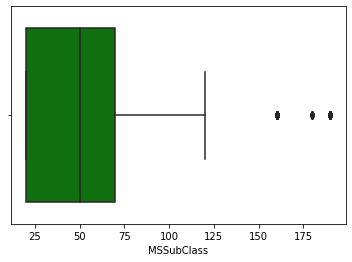

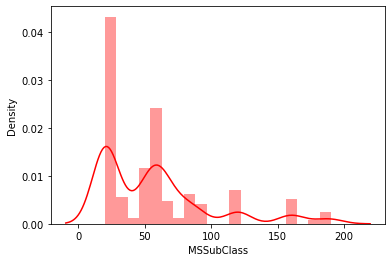

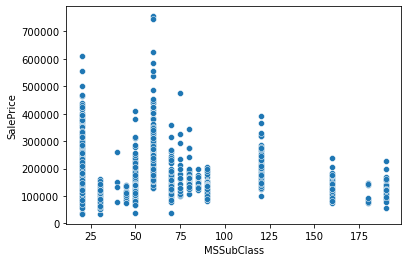

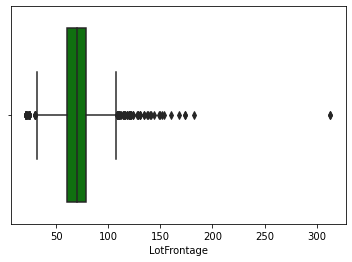

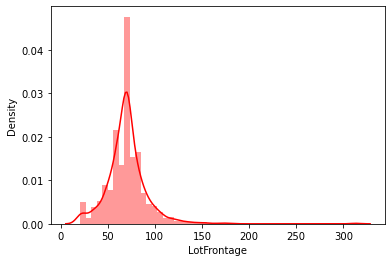

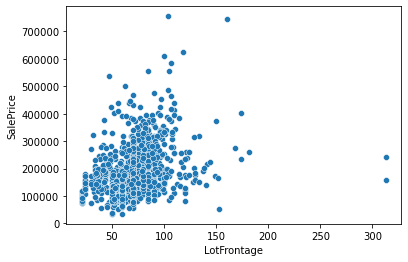

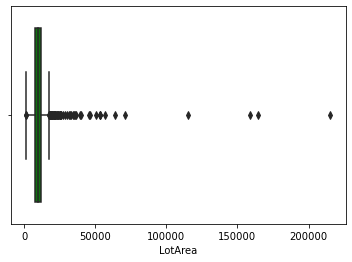

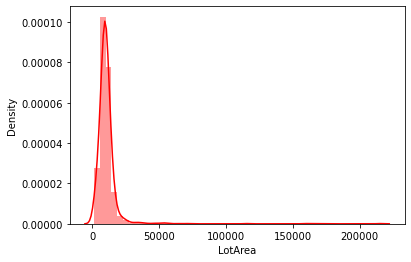

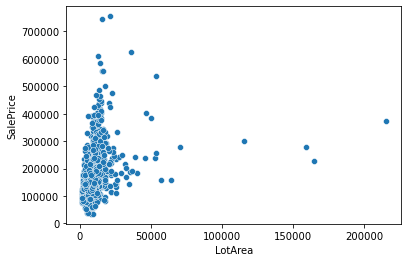

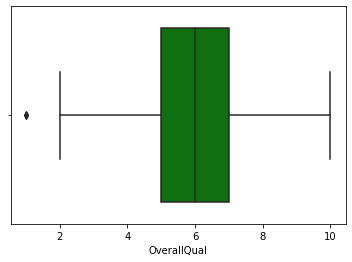

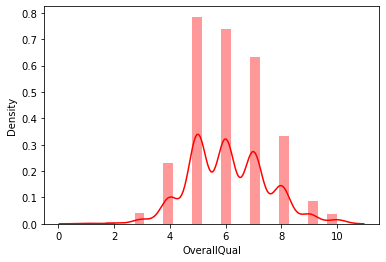

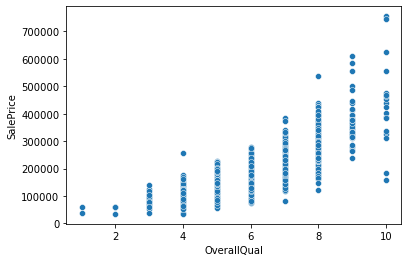

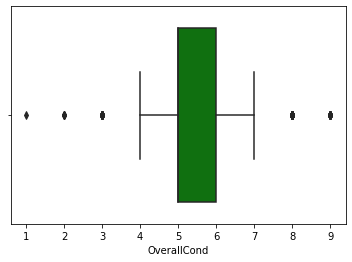

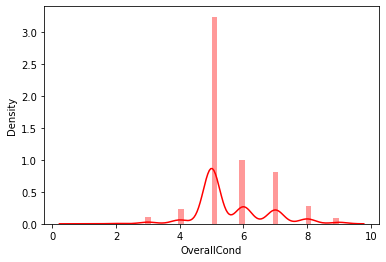

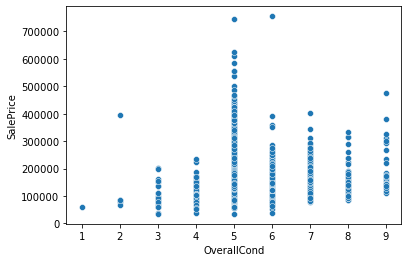

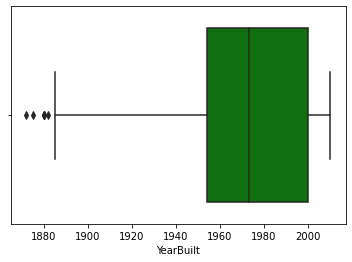

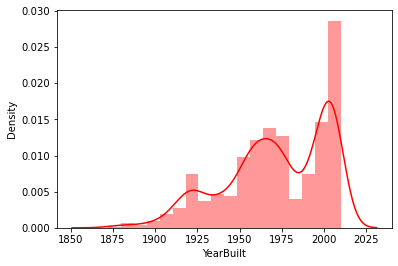

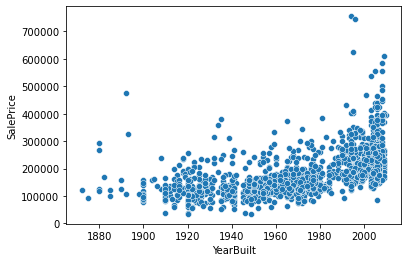

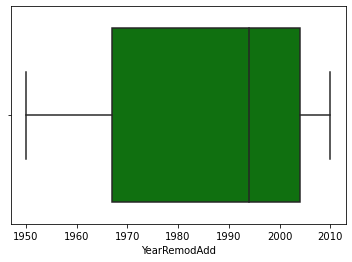

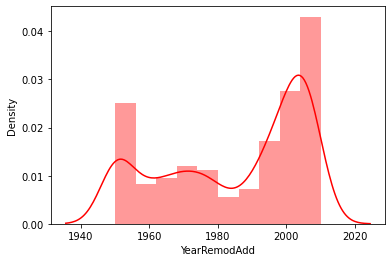

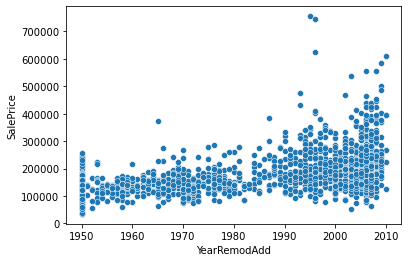

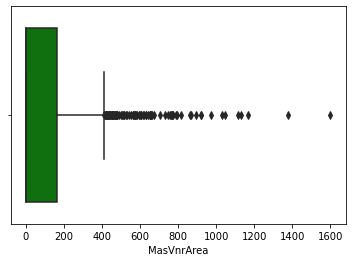

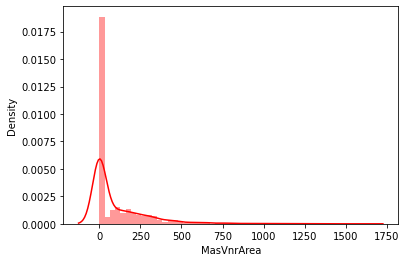

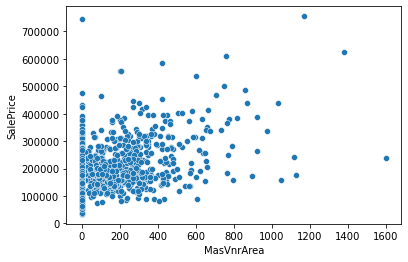

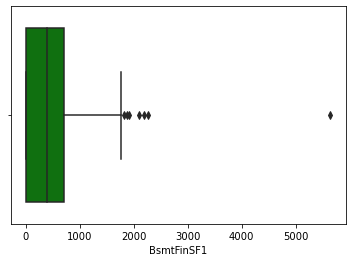

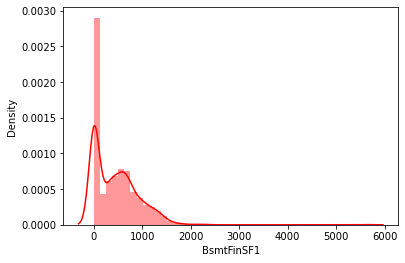

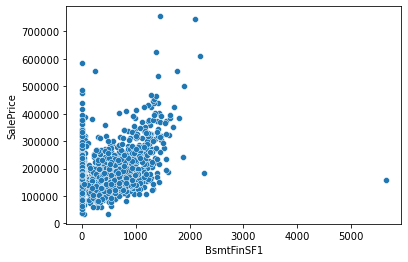

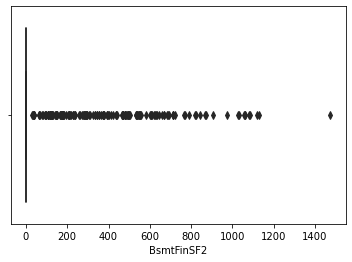

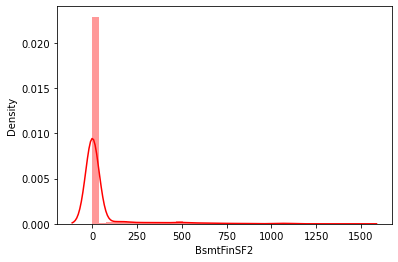

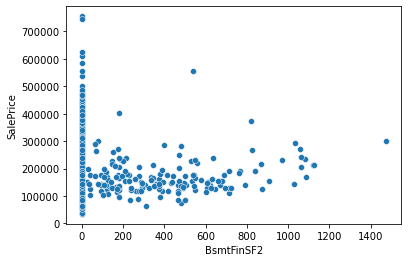

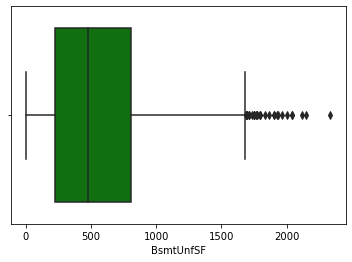

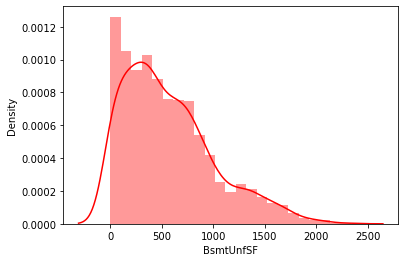

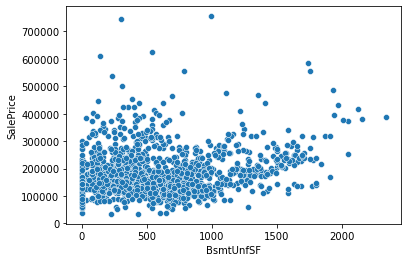

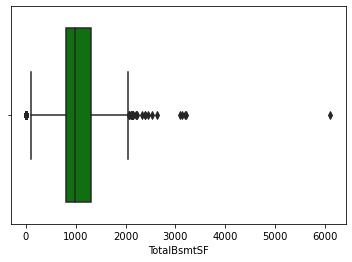

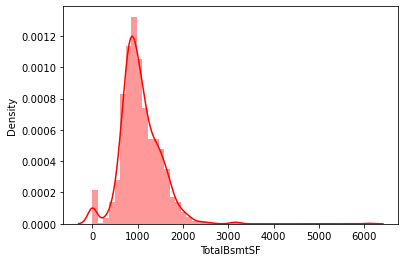

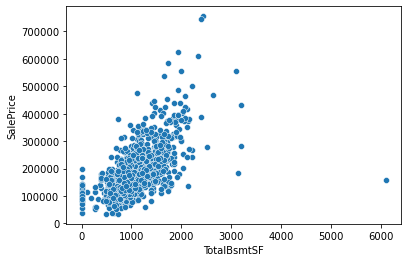

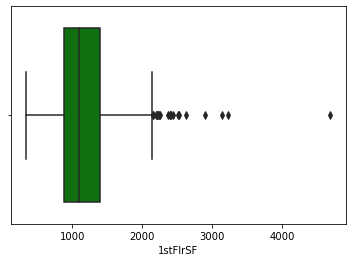

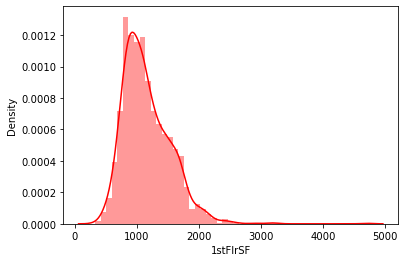

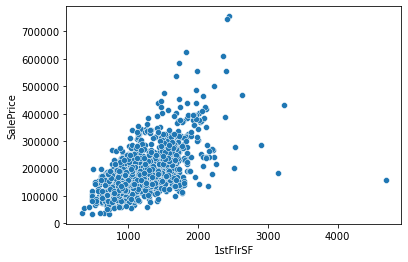

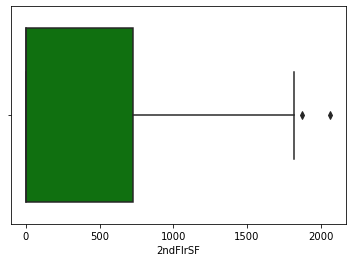

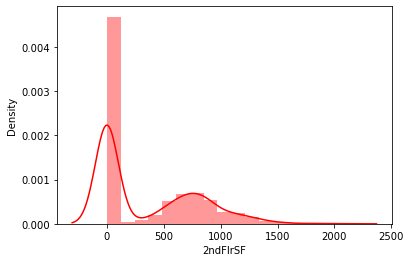

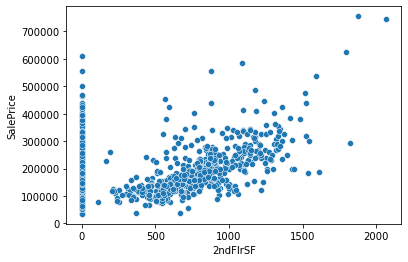

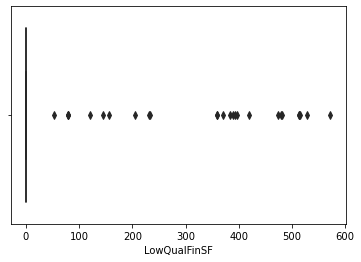

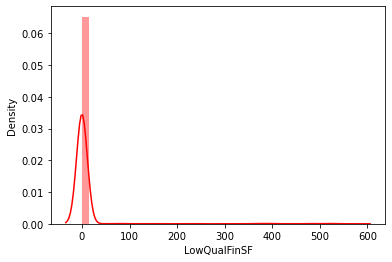

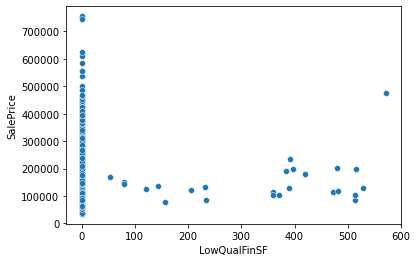

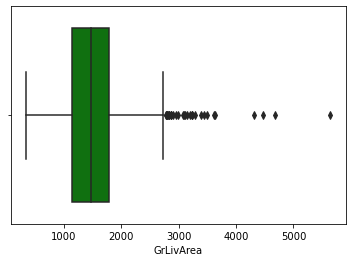

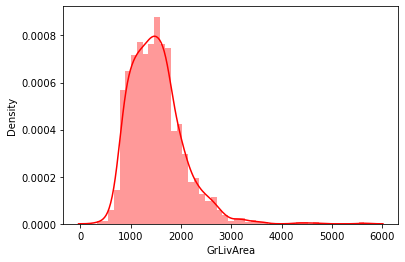

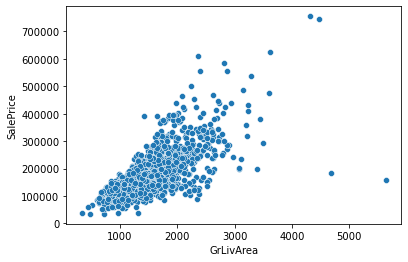

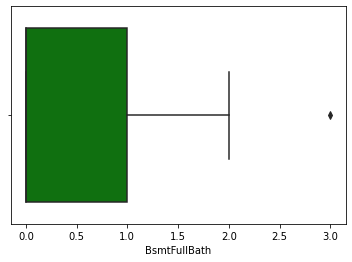

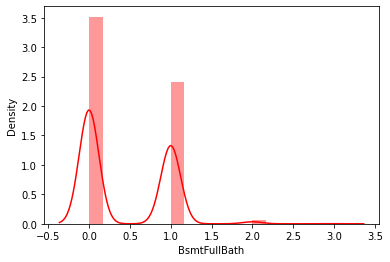

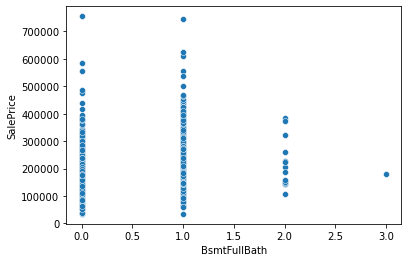

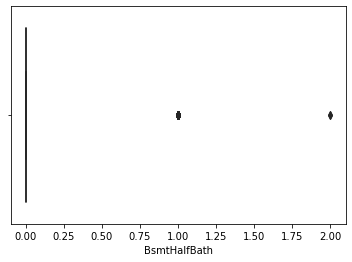

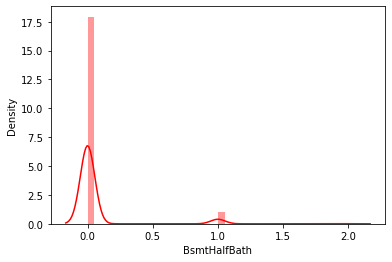

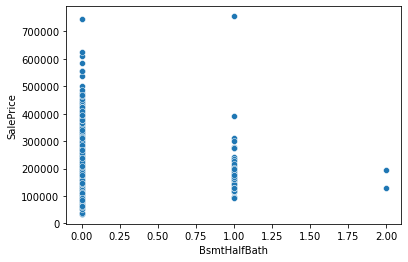

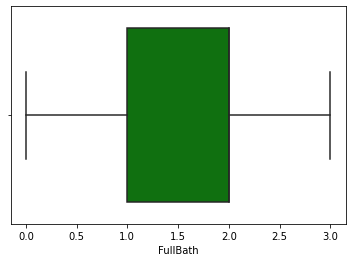

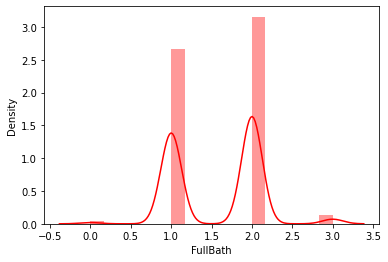

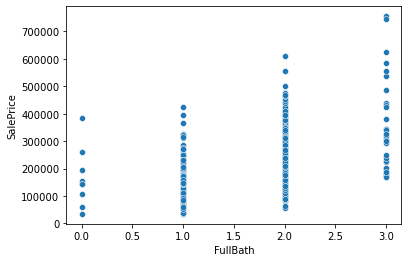

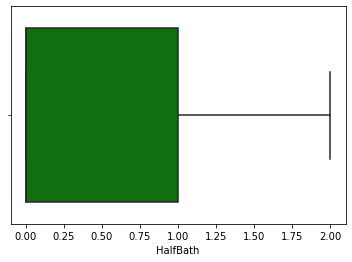

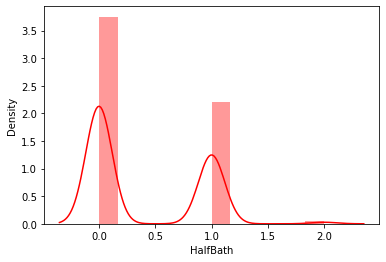

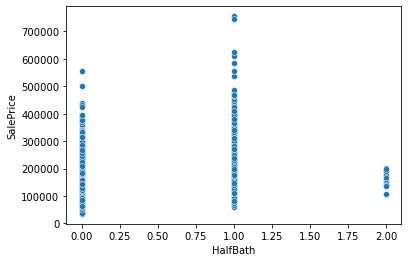

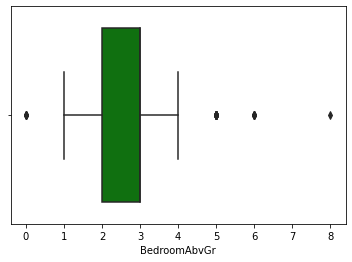

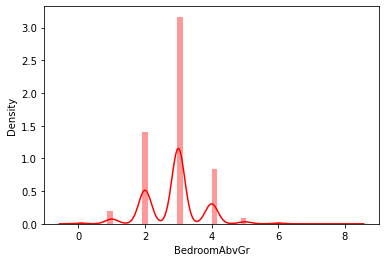

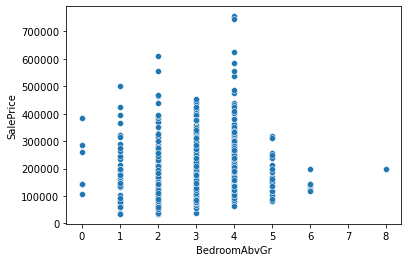

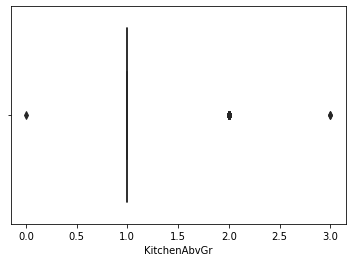

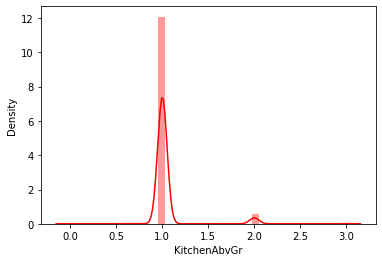

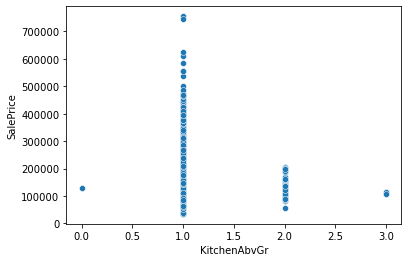

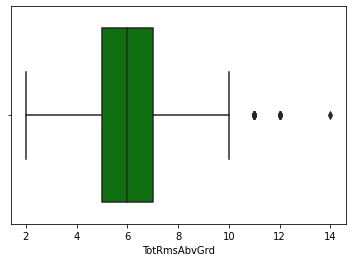

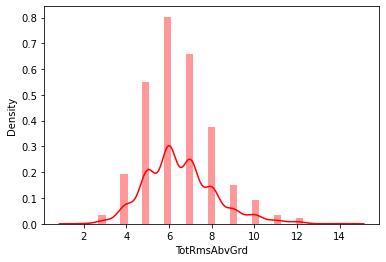

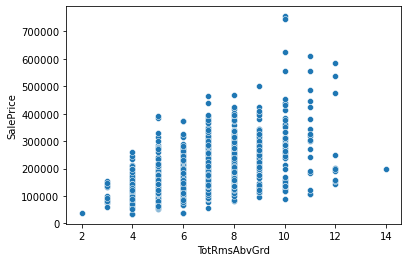

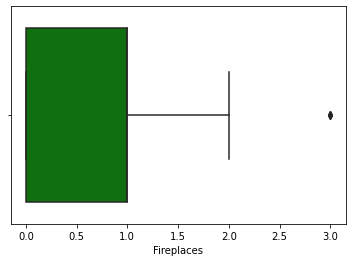

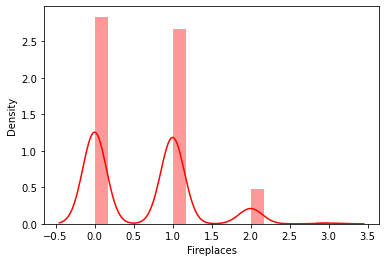

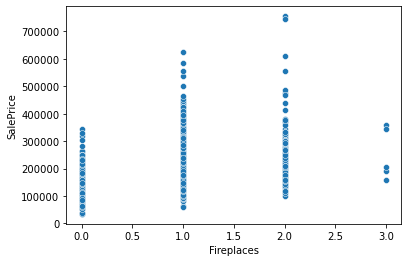

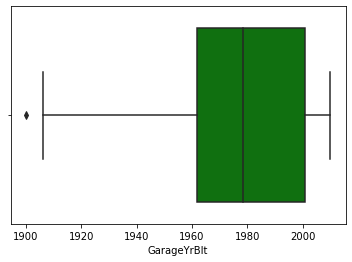

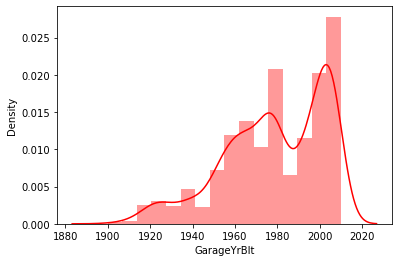

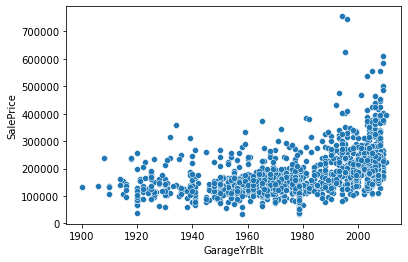

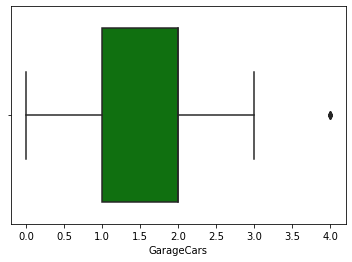

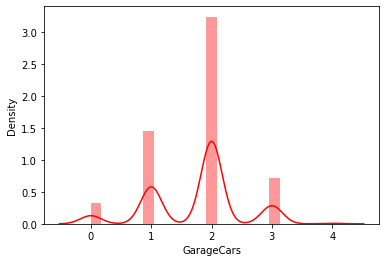

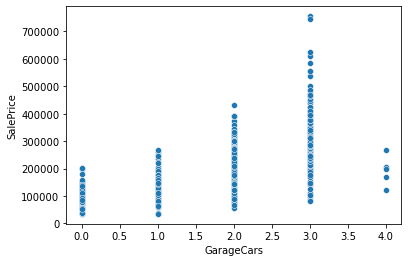

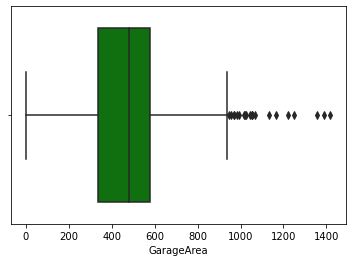

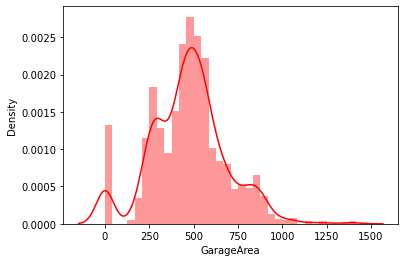

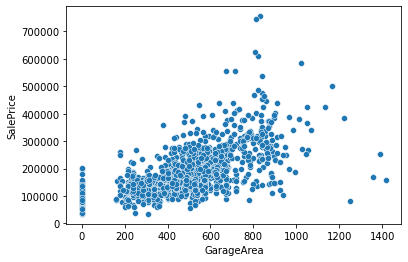

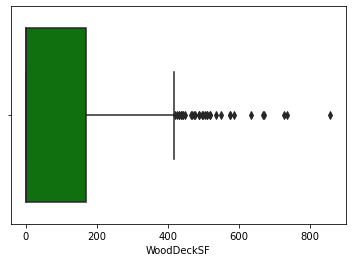

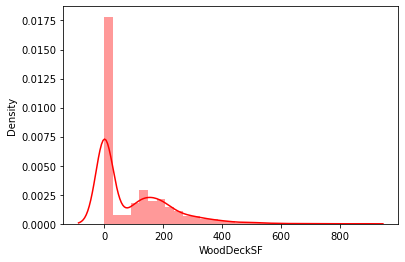

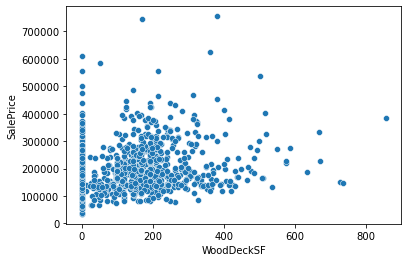

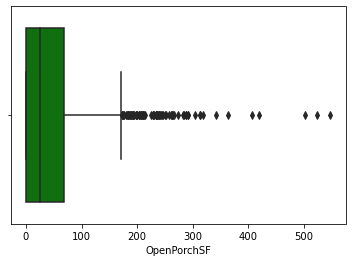

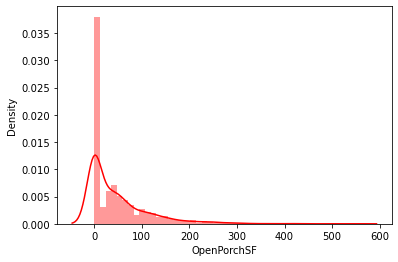

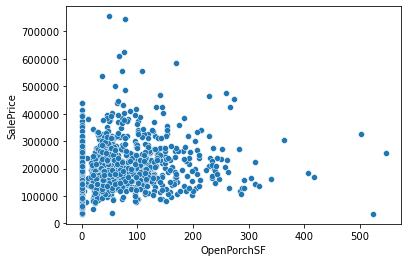

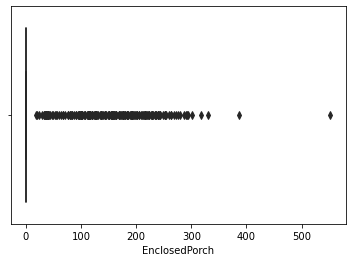

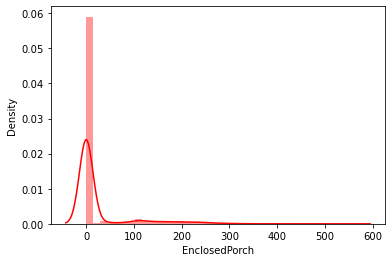

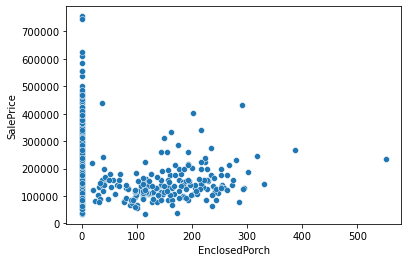

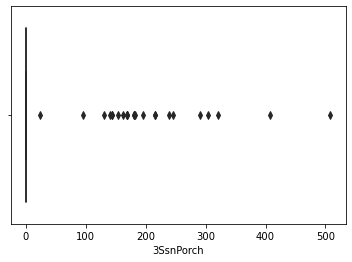

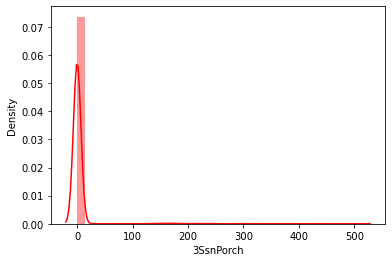

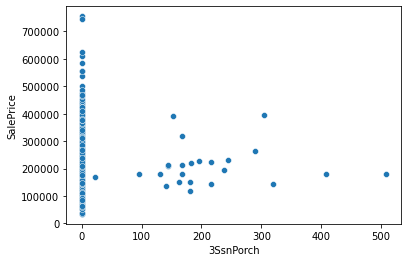

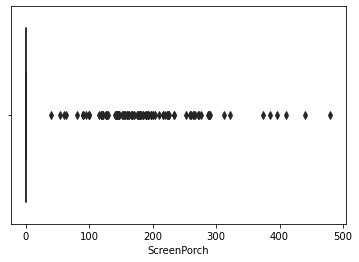

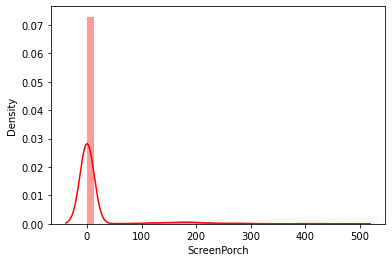

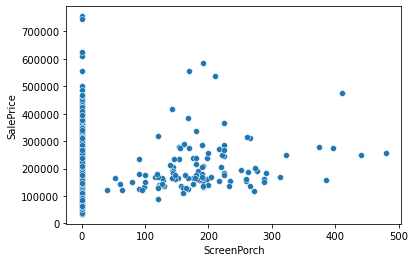

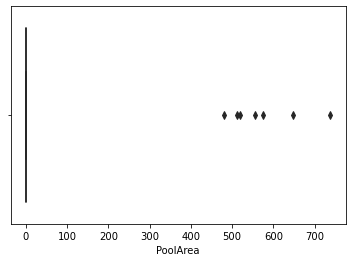

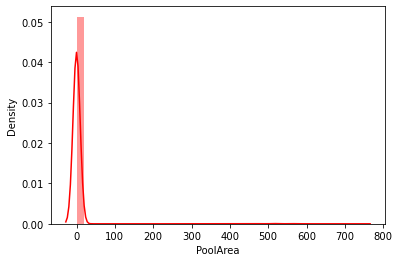

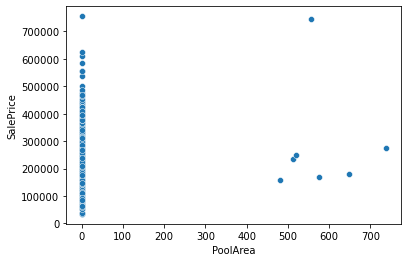

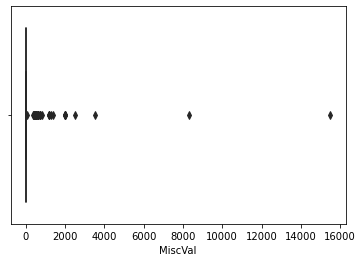

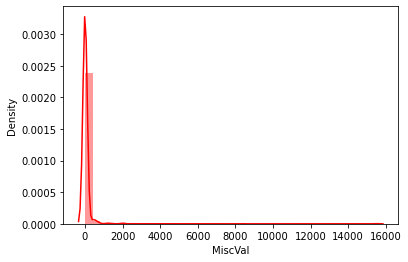

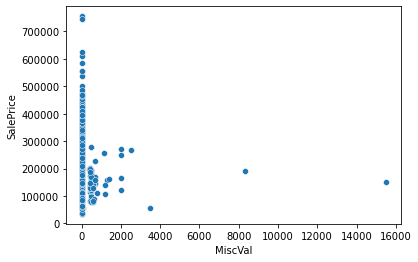

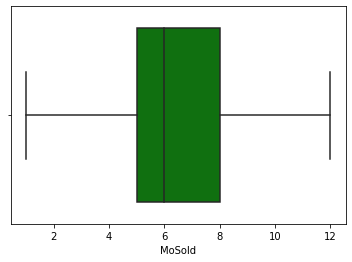

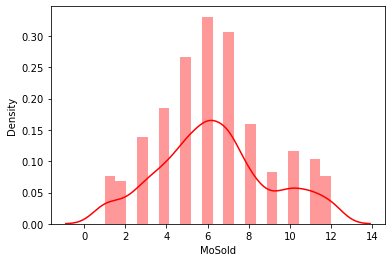

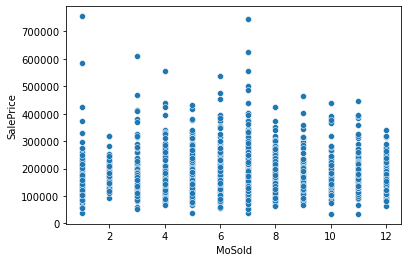

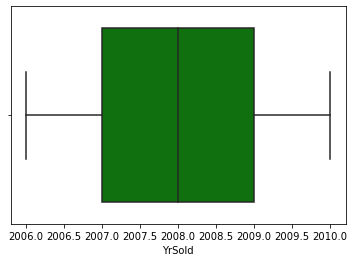

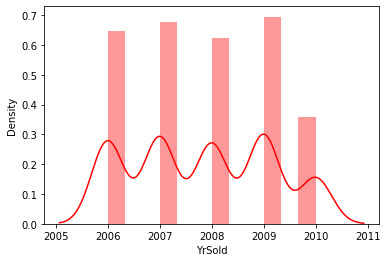

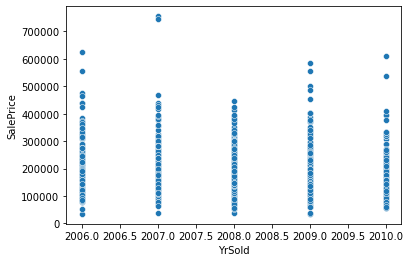

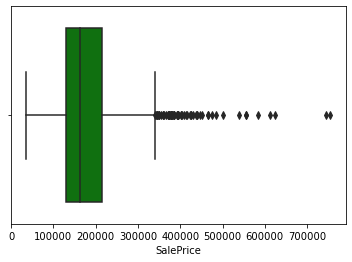

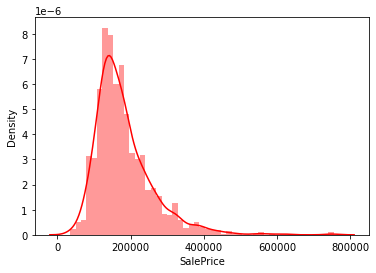

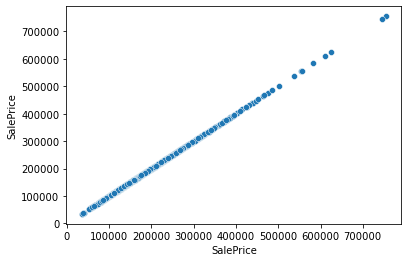

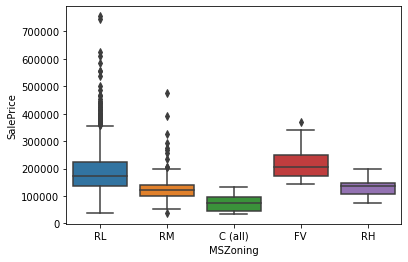

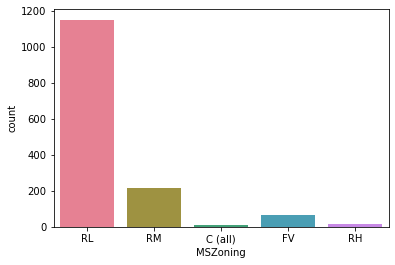

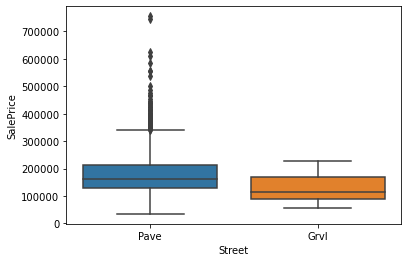

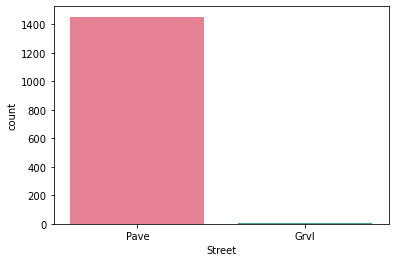

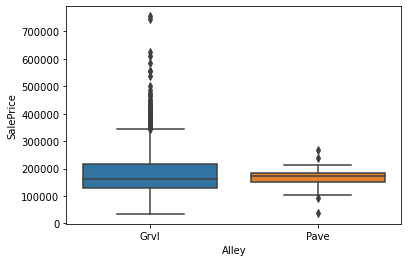

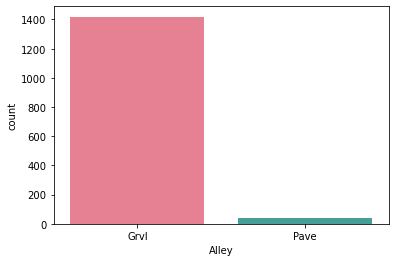

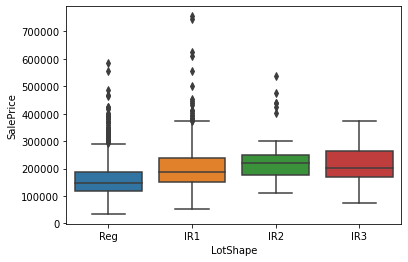

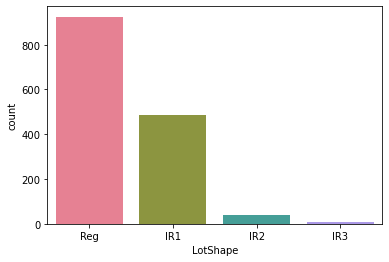

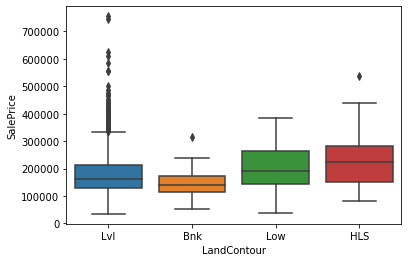

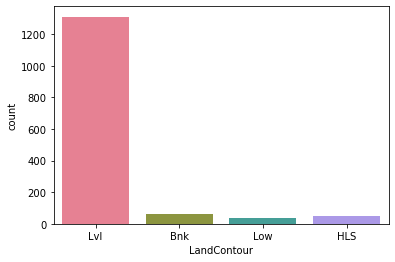

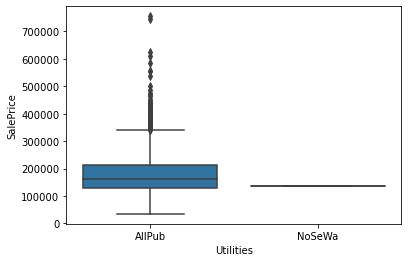

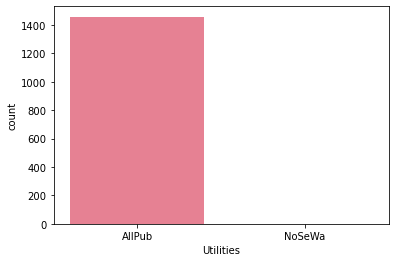

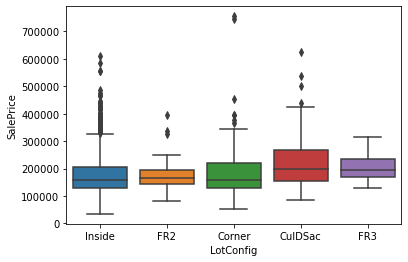

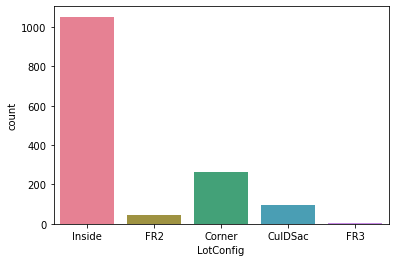

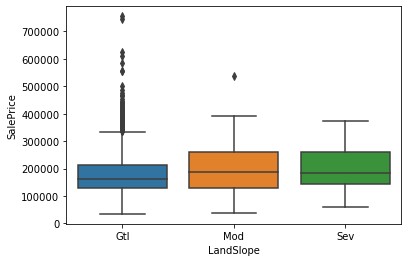

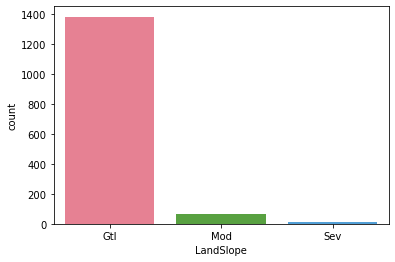

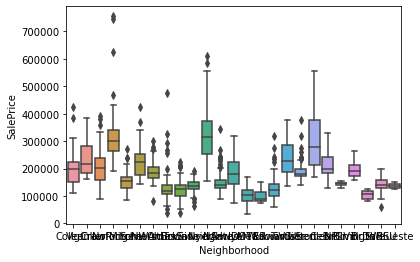

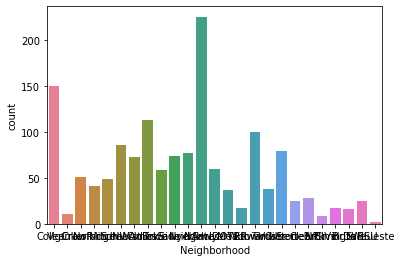

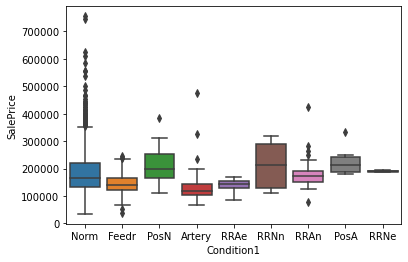

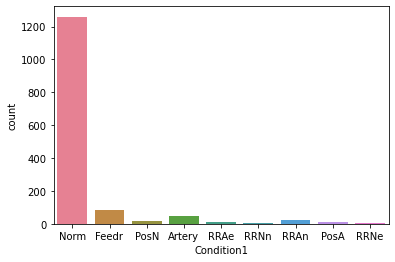

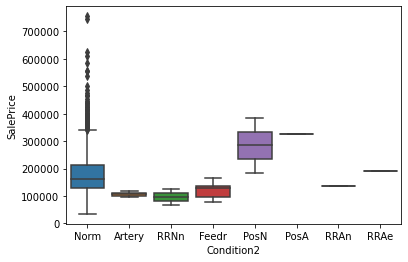

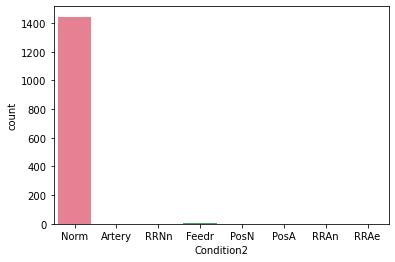

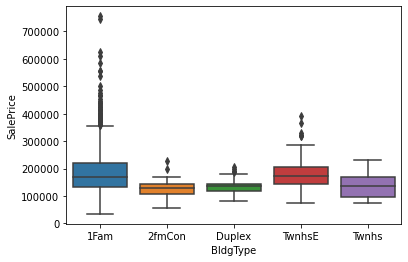

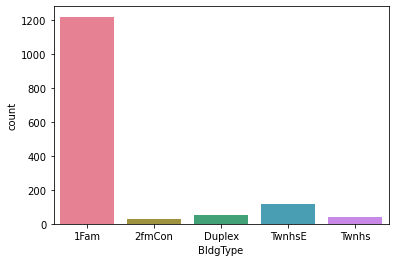

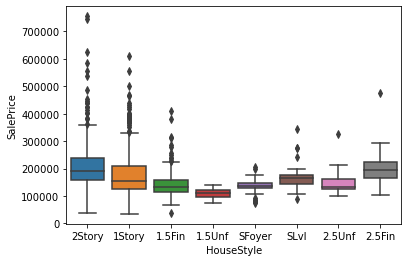

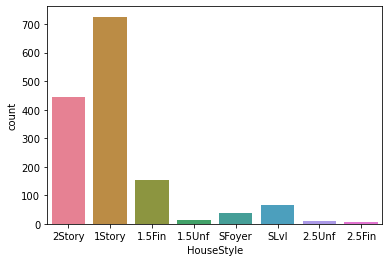

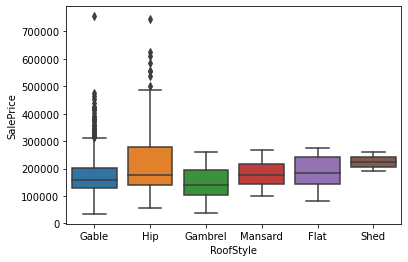

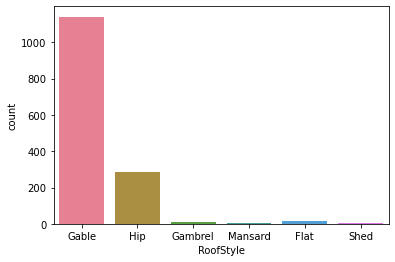

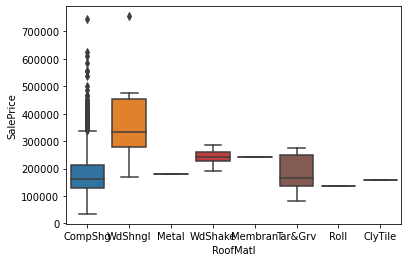

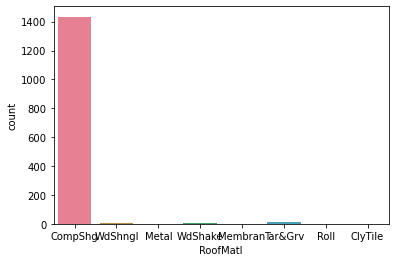

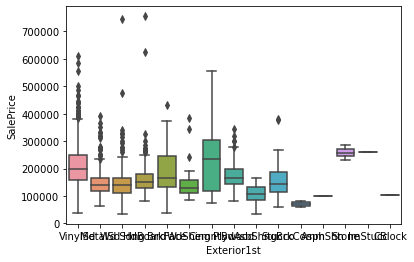

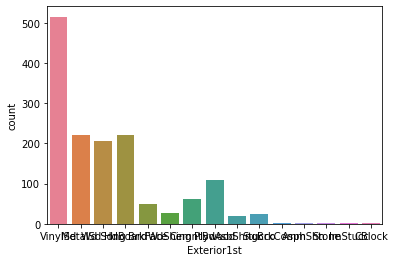

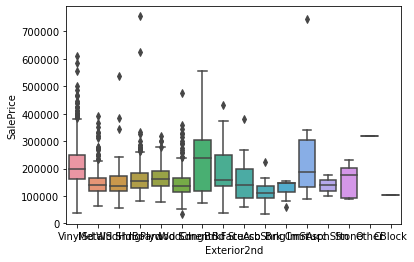

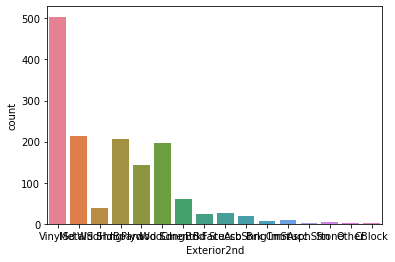

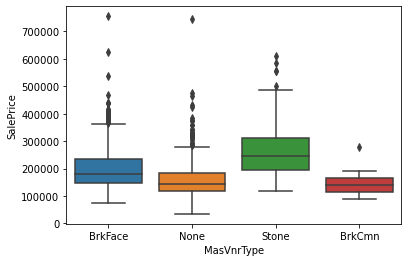

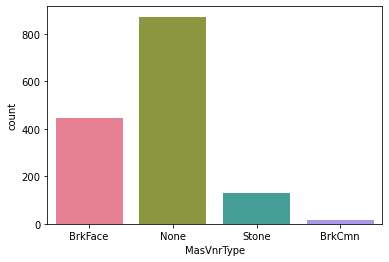

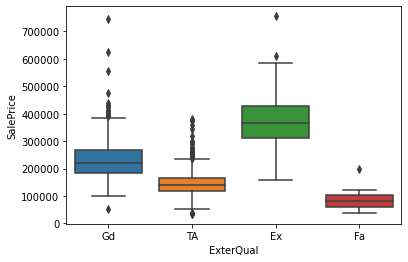

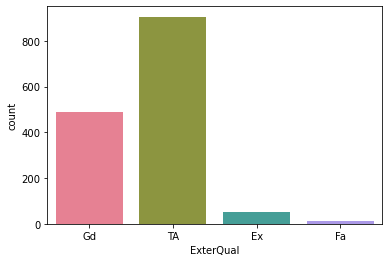

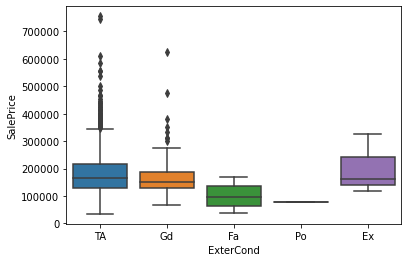

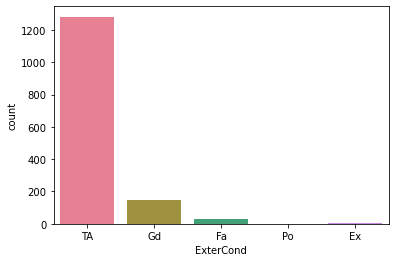

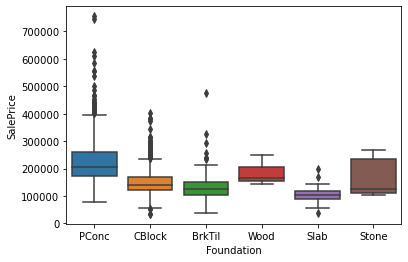

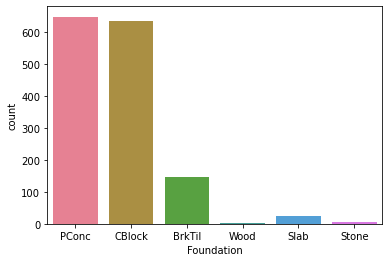

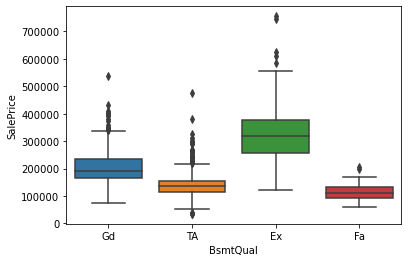

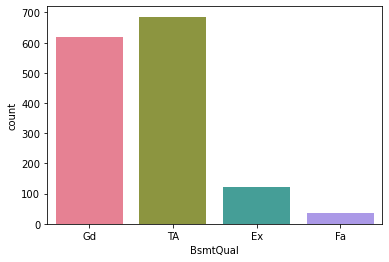

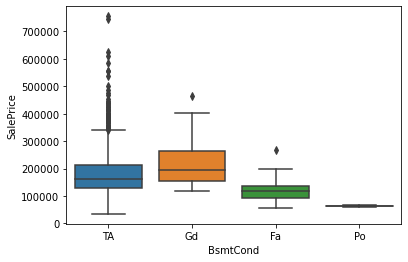

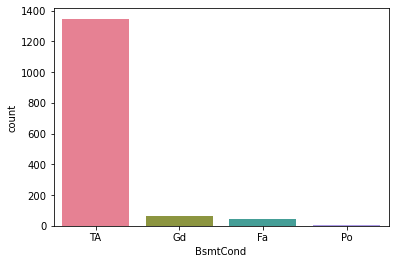

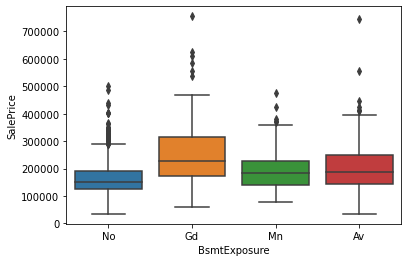

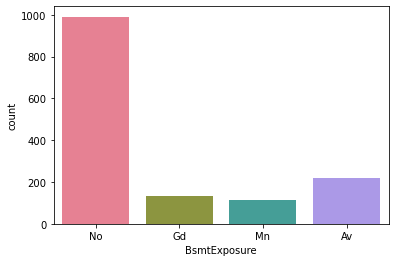

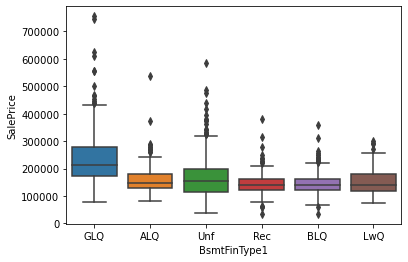

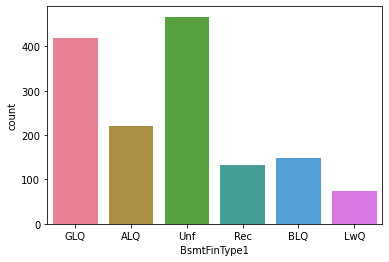

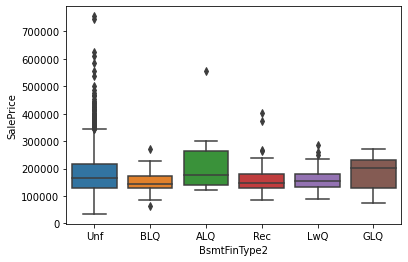

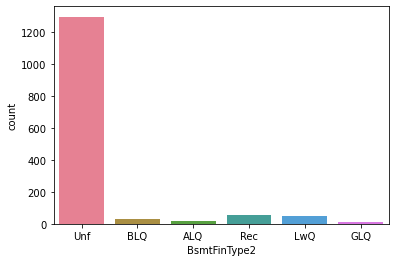

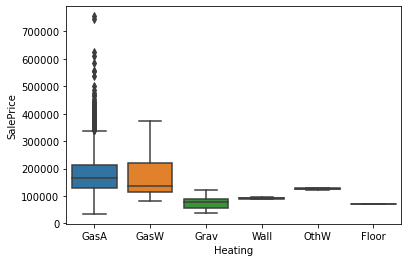

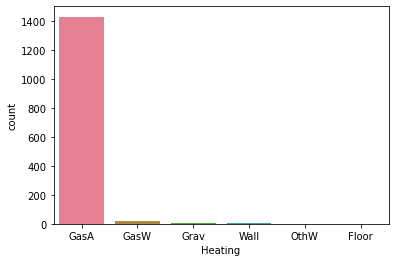

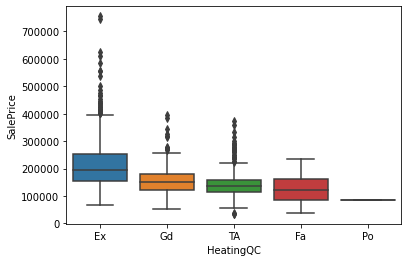

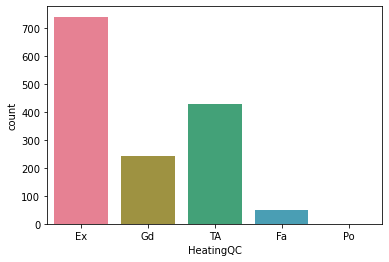

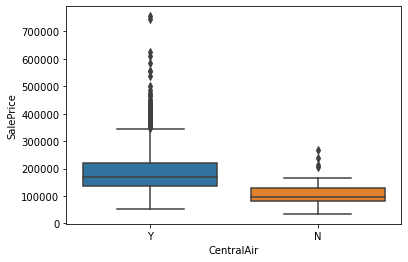

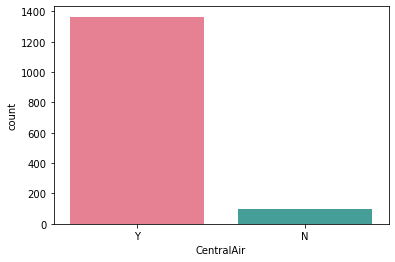

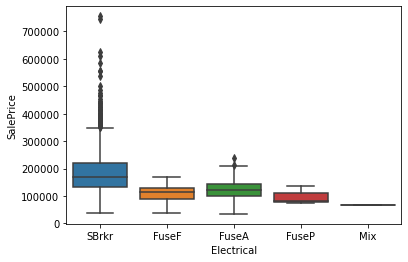

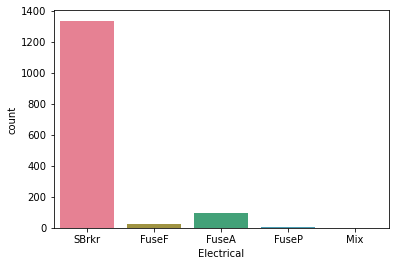

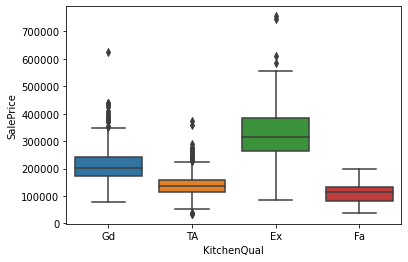

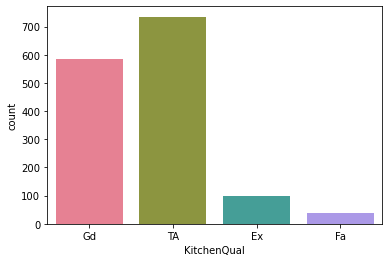

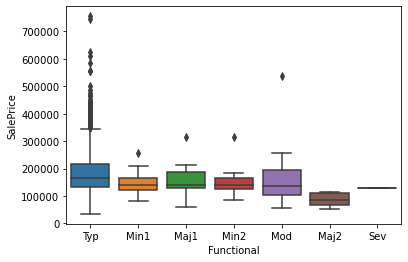

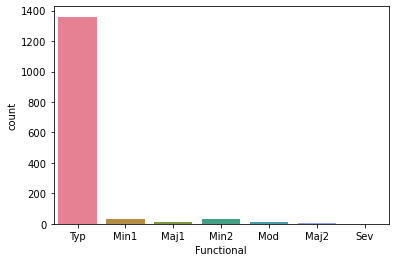

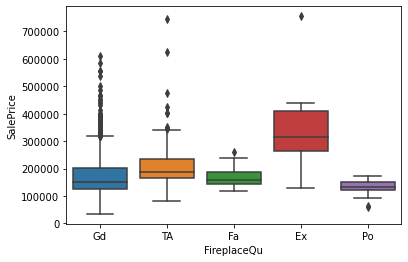

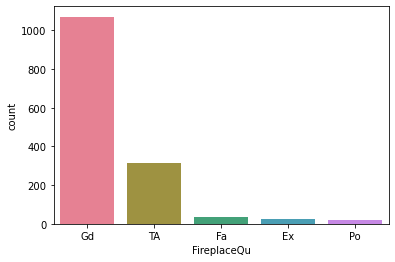

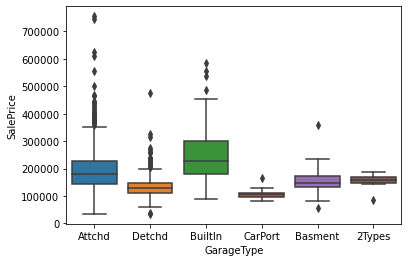

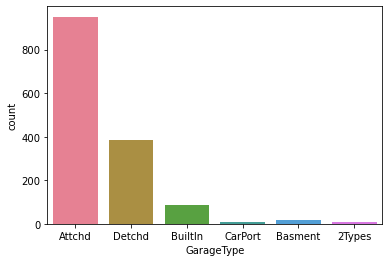

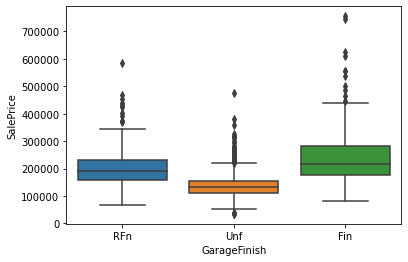

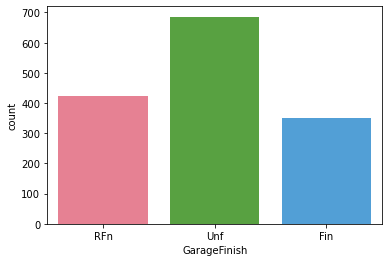

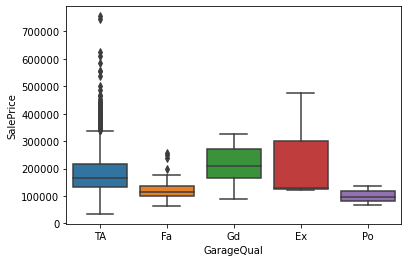

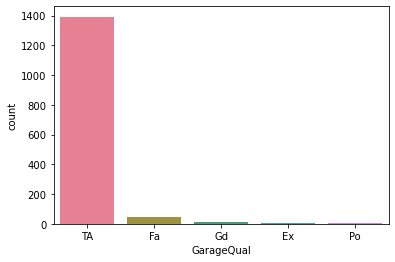

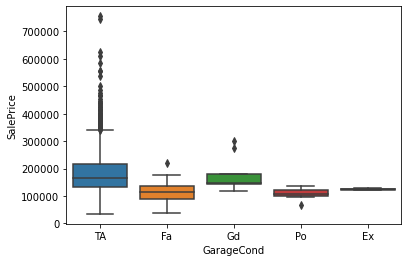

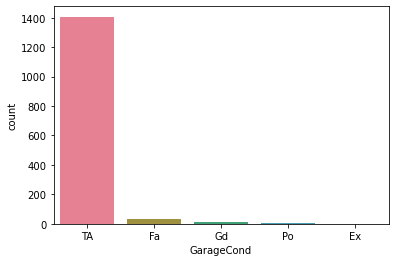

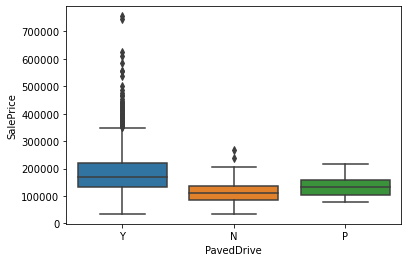

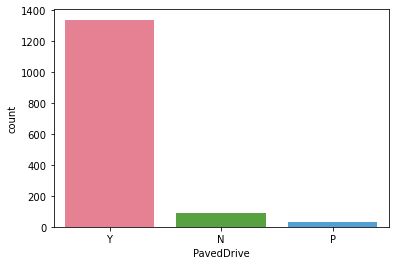

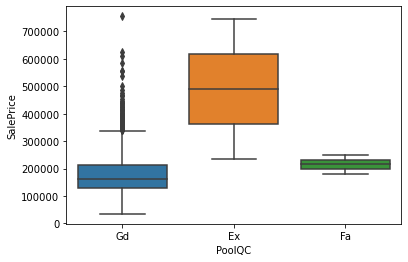

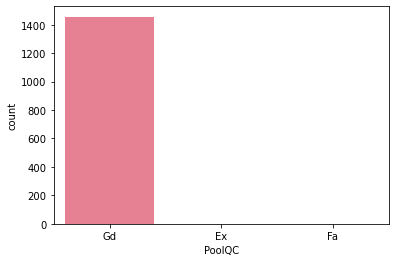

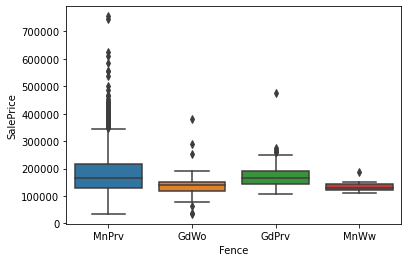

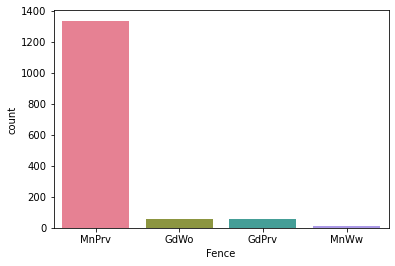

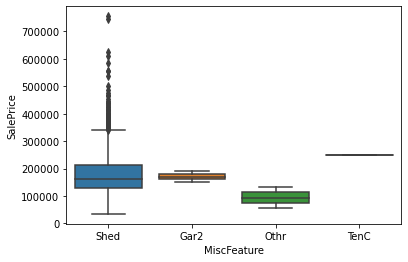

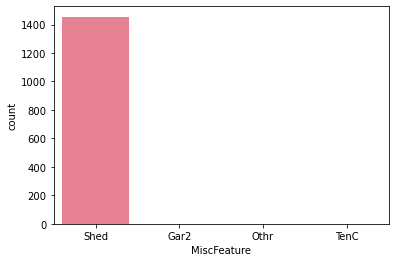

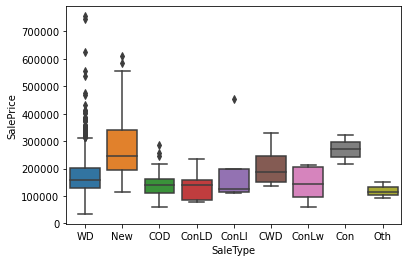

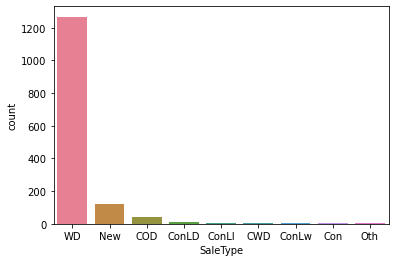

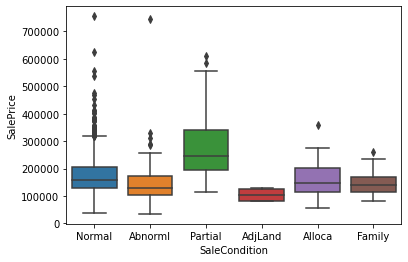

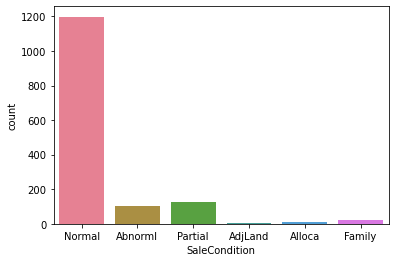

In [13]:
EDA(House_train)

In [14]:
# ANOVA test for checking important categorical features
cat = []
con = []
for i in House_train.columns:
    if(House_train[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)
        
def ANOVA(df,cat,con):
    from pandas import DataFrame
    from statsmodels.api import OLS
    from statsmodels.formula.api import ols
    rel = con + " ~ " + cat
    model = ols(rel,df).fit()
    from statsmodels.stats.anova import anova_lm
    anova_results = anova_lm(model)
    Q = DataFrame(anova_results)
    a = Q['PR(>F)'][cat]
    return round(a,4)

imp_cat_cols = []
for i in cat :
    pval = ANOVA(House_train,i,"SalePrice")
    print("SalePrice vs ",i, ANOVA(House_train,i,"SalePrice"))
    if(pval < 0.05 ):
        imp_cat_cols.append(i)

SalePrice vs  MSZoning 0.0
SalePrice vs  Street 0.117
SalePrice vs  Alley 0.291
SalePrice vs  LotShape 0.0
SalePrice vs  LandContour 0.0
SalePrice vs  Utilities 0.5847
SalePrice vs  LotConfig 0.0
SalePrice vs  LandSlope 0.1414
SalePrice vs  Neighborhood 0.0
SalePrice vs  Condition1 0.0
SalePrice vs  Condition2 0.0434
SalePrice vs  BldgType 0.0
SalePrice vs  HouseStyle 0.0
SalePrice vs  RoofStyle 0.0
SalePrice vs  RoofMatl 0.0
SalePrice vs  Exterior1st 0.0
SalePrice vs  Exterior2nd 0.0
SalePrice vs  MasVnrType 0.0
SalePrice vs  ExterQual 0.0
SalePrice vs  ExterCond 0.0
SalePrice vs  Foundation 0.0
SalePrice vs  BsmtQual 0.0
SalePrice vs  BsmtCond 0.0
SalePrice vs  BsmtExposure 0.0
SalePrice vs  BsmtFinType1 0.0
SalePrice vs  BsmtFinType2 0.036
SalePrice vs  Heating 0.0008
SalePrice vs  HeatingQC 0.0
SalePrice vs  CentralAir 0.0
SalePrice vs  Electrical 0.0
SalePrice vs  KitchenQual 0.0
SalePrice vs  Functional 0.0005
SalePrice vs  FireplaceQu 0.0
SalePrice vs  GarageType 0.0
SalePrice v

In [15]:
House_train.corr()["SalePrice"].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.334901
BsmtFinSF1       0.386420
Fireplaces       0.466929
GarageYrBlt      0.470177
MasVnrArea       0.475241
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [16]:
imp_con_cols = list(House_train.corr()["SalePrice"].sort_values().tail(15).index)

In [17]:
imp_con_cols.remove("SalePrice")
imp_con_cols

['BsmtFinSF1',
 'Fireplaces',
 'GarageYrBlt',
 'MasVnrArea',
 'YearRemodAdd',
 'YearBuilt',
 'TotRmsAbvGrd',
 'FullBath',
 '1stFlrSF',
 'TotalBsmtSF',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'OverallQual']

In [18]:
imp_cols = []
imp_cols.extend(imp_con_cols)
imp_cols.extend(imp_cat_cols)

# Feature selection

In [19]:
Y = House_train[["SalePrice"]]
X = House_train.drop(["SalePrice"],axis=1)

In [20]:
len(X.columns)

79

In [21]:
len(X[imp_cols].columns)

52

In [22]:
X = X[imp_cols]

In [23]:
len(X.columns)

52

# Data Preprocessing

using one hot encoding for categorical and standardscaler for continous varibles

In [24]:
def preprocessing(df):
    import pandas as pd
    cat = []
    con = []
    for i in df.columns:
        if(df[i].dtypes == "object"):
            cat.append(i)
        else:
            con.append(i)
    X1 = pd.get_dummies(df[cat])
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    X2 = pd.DataFrame(ss.fit_transform(df[con]),columns=con)
    X3 = X2.join(X1)
    return X3

In [25]:
Xnew = preprocessing(X)

In [26]:
#Xnew

# Outlier Treatment

In [27]:
def outliers(df):
    T = []
    for i in range(0,len(df.columns)):
        for j in range(0,df.shape[0]):
            x = df.iloc[j,i]
            if((x>3)or(x<-3)):
                T.append(j)

    from numpy import unique
    rows_del = list(unique(T))
    return rows_del

In [28]:
outliers= outliers(Xnew)

In [29]:
Xnew = Xnew.drop(outliers)

In [30]:
Y = Y.drop(outliers)

In [31]:
import pandas as pd


# set index
index = pd.Index(range(0, 1387, 1))
Xnew = Xnew.set_index(index)
#print(Xnew)

In [32]:
import pandas as pd


# set index
index = pd.Index(range(0, 1387, 1))
Y = Y.set_index(index)
#print(Y)

# Divide data in Training & testing set

In [33]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# Create Linear Regression Model

In [34]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model_lm= lm.fit(xtrain,ytrain)
tr_pred = model_lm.predict(xtrain)
ts_pred = model_lm.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err_lm = mean_absolute_error(ytrain,tr_pred)
ts_err_lm = mean_absolute_error(ytest,ts_pred)
print("training_error_lm :", tr_err_lm)
print("testing_error_lm :", tr_err_lm)

training_error_lm : 12733.773669972948
testing_error_lm : 12733.773669972948


In [35]:
#model_lm.coef_

In [36]:
model_lm.intercept_

array([-6.90448468e+16])

# Regularize

In [37]:
from sklearn.model_selection import GridSearchCV

# Lasso Regularization - (L1)

In [38]:
grid = []
x = 180
for i in range(0,100,1):
    x = x + 0.01
    x = round(x,4)
    grid.append(x)

from sklearn.linear_model import Lasso
ls = Lasso()
tg = {"alpha" : grid}
cv = GridSearchCV(ls,tg,scoring = "neg_mean_squared_error",cv=3)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'alpha': 180.01}

In [39]:
grid = []
x = 180
for i in range(0,100,1):
    x = x + 0.01
    x = round(x,4)
    grid.append(x)


from sklearn.linear_model import Lasso

trerrs = []
tserrs = []
for i in grid:
    ls = Lasso(alpha=i)
    model_lasso = ls.fit(xtrain,ytrain)
    tr_pred = model_lasso.predict(xtrain)
    ts_pred = model_lasso.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    ts_err = mean_absolute_error(ytest,ts_pred)
    tserrs.append(ts_err)
    tr_err = mean_absolute_error(ytrain,tr_pred)
    trerrs.append(tr_err)
    print("alpha",i,"Training_Err",round(tr_err,4),"Testing_Err",round(ts_err,4),"\t",tr_err - ts_err )

alpha 180.01 Training_Err 14419.8961 Testing_Err 14421.3058 	 -1.4096998801833251
alpha 180.02 Training_Err 14419.9468 Testing_Err 14421.3337 	 -1.3869679019335308
alpha 180.03 Training_Err 14419.9974 Testing_Err 14421.3617 	 -1.3642358234283165
alpha 180.04 Training_Err 14420.0481 Testing_Err 14421.3897 	 -1.3415758446881227
alpha 180.05 Training_Err 14420.0988 Testing_Err 14421.4178 	 -1.318932825781303
alpha 180.06 Training_Err 14420.1495 Testing_Err 14421.4458 	 -1.2963157371850684
alpha 180.07 Training_Err 14420.2002 Testing_Err 14421.474 	 -1.2737636766414653
alpha 180.08 Training_Err 14420.2509 Testing_Err 14421.5021 	 -1.2512589744565048
alpha 180.09 Training_Err 14420.3016 Testing_Err 14421.5303 	 -1.2287918585661828
alpha 180.1 Training_Err 14420.3522 Testing_Err 14421.5586 	 -1.2063964683893573
alpha 180.11 Training_Err 14420.4029 Testing_Err 14421.5869 	 -1.1840239611483412
alpha 180.12 Training_Err 14420.4535 Testing_Err 14421.6152 	 -1.1616514544657548
alpha 180.13 Traini

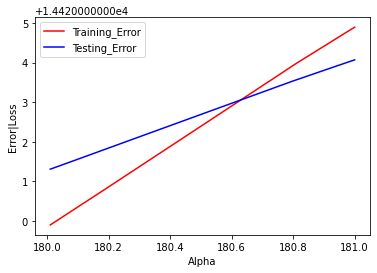

In [40]:
import matplotlib.pyplot as plt
plt.plot(grid,trerrs,c="red",label="Training_Error")
plt.plot(grid,tserrs,c="blue",label="Testing_Error")
plt.xlabel("Alpha")
plt.ylabel("Error|Loss")
plt.legend()
plt.show()

# Ridge Regularization - (L2)

In [41]:
Q = []
x = 126
for i in range(0,20,1):
    x = x + 0.001
    x = round(x,4)
    Q.append(x)


from sklearn.linear_model import Ridge

for i in Q:
    rr = Ridge(alpha=i)
    model_rr = rr.fit(xtrain,ytrain)
    tr_pred = model_rr.predict(xtrain)
    ts_pred = model_rr.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    ts_err = mean_absolute_error(ytest,ts_pred)
    tr_err = mean_absolute_error(ytrain,tr_pred)
    print("alpha",i,"\ttr_Err",round(tr_err,4),"\tts_Err",round(ts_err,4),ts_err-tr_err)

alpha 126.001 	tr_Err 15305.2468 	ts_Err 15306.0014 0.7545446583662851
alpha 126.002 	tr_Err 15305.2567 	ts_Err 15306.0042 0.7475395600813499
alpha 126.003 	tr_Err 15305.2665 	ts_Err 15306.007 0.7405345010338351
alpha 126.004 	tr_Err 15305.2763 	ts_Err 15306.0099 0.7335294811964559
alpha 126.005 	tr_Err 15305.2862 	ts_Err 15306.0127 0.7265245005983161
alpha 126.006 	tr_Err 15305.296 	ts_Err 15306.0155 0.7195195592030359
alpha 126.007 	tr_Err 15305.3058 	ts_Err 15306.0184 0.7125146570524521
alpha 126.008 	tr_Err 15305.3157 	ts_Err 15306.0212 0.7055097941083659
alpha 126.009 	tr_Err 15305.3255 	ts_Err 15306.024 0.6985049703998811
alpha 126.01 	tr_Err 15305.3354 	ts_Err 15306.0269 0.691500185897894
alpha 126.011 	tr_Err 15305.3452 	ts_Err 15306.0297 0.6844954406260513
alpha 126.012 	tr_Err 15305.355 	ts_Err 15306.0325 0.6774907345716201
alpha 126.013 	tr_Err 15305.3649 	ts_Err 15306.0353 0.6704860677382385
alpha 126.014 	tr_Err 15305.3747 	ts_Err 15306.0382 0.6634814401313633
alpha 126.01

# Decision Tree for Regression Model

In [42]:
from sklearn.tree import DecisionTreeRegressor
model_dtr = DecisionTreeRegressor(random_state=21)
model = model_dtr.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,pred_tr)

ts_err = mean_absolute_error(ytest,pred_ts)
print("training_error_dec_tree :", tr_err)
print("testing_error_dec_tree :", ts_err)

training_error_dec_tree : 6.911632100991884
testing_error_dec_tree : 22291.258992805757


# Decision Tree Model has good training accuracy but give bad testing accuracy - model is overfitted

# Plot the tree

In [43]:
from sklearn.tree import export_graphviz
export_graphviz(model_dtr,out_file="E:/ETLHIVE/House_saleprice.out")

In [44]:
#http://webgraphviz.com/

# Pruning of Decision tree

In [45]:
from sklearn.model_selection import GridSearchCV
tg = {"min_samples_leaf":range(2,500,1)}
dtr = DecisionTreeRegressor(random_state=21)
cv = GridSearchCV(dtr,tg,scoring="neg_mean_squared_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'min_samples_leaf': 13}

In [46]:
from sklearn.model_selection import GridSearchCV
tg = {"min_samples_split":range(2,500,1)}
dtr = DecisionTreeRegressor(random_state=21)
cv = GridSearchCV(dtr,tg,scoring="neg_mean_squared_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'min_samples_split': 36}

In [47]:
from sklearn.tree import DecisionTreeRegressor
model_dtr = DecisionTreeRegressor(random_state=21,min_samples_leaf=13)
model = model_dtr.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,pred_tr)

ts_err = mean_absolute_error(ytest,pred_ts)
print("training_error_dec_tree :", tr_err)
print("testing_error_dec_tree :", ts_err)

training_error_dec_tree : 17062.230033818058
testing_error_dec_tree : 21222.320281158223


In [48]:
from sklearn.tree import DecisionTreeRegressor
model_dtr = DecisionTreeRegressor(random_state=21,min_samples_split=36)
model_dtr = model_dtr.fit(xtrain,ytrain)
pred_tr = model_dtr.predict(xtrain)
pred_ts = model_dtr.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,pred_tr)

ts_err = mean_absolute_error(ytest,pred_ts)
print("training_error_dec_tree :", tr_err)
print("testing_error_dec_tree :", ts_err)

training_error_dec_tree : 16179.028828734141
testing_error_dec_tree : 22176.619771625392


# Create Random Forest classifier model

In [49]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state = 21)
model_rfr = rfr.fit(xtrain,ytrain)
predtr2 = model_rfr.predict(xtrain)
predts2 = model_rfr.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_acc_rfr = mean_absolute_error(ytrain,predtr2)
ts_acc_rfr = mean_absolute_error(ytest,predts2)
print("training_error_rf :", tr_acc_rfr)
print("testing_error_rf :", ts_acc_rfr)

training_error_rf : 6445.55421647559
testing_error_rf : 16156.27807553957


# Random Forest Model has good training accuracy but give bad testing accuracy - model is overfitted

so we use prunning to overcome this overfitting, for that we use "n_estimators" Hyperparameter

In [50]:
from sklearn.model_selection import GridSearchCV
tg = {"n_estimators":range(2,100,1)}
rfr = RandomForestRegressor(random_state = 21)
cv1 = GridSearchCV(rfr,tg,scoring="neg_mean_squared_error",cv=4)
cvmodel1 = cv1.fit(xtrain,ytrain)
cvmodel1.best_params_

{'n_estimators': 98}

In [51]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=98,random_state = 21,min_samples_split=36)
model_rfr = rfr.fit(xtrain,ytrain)
predtr2 = model_rfr.predict(xtrain)
predts2 = model_rfr.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_acc_rfr = mean_absolute_error(ytrain,predtr2)
ts_acc_rfr = mean_absolute_error(ytest,predts2)
print("training_error_rf :", tr_acc_rfr)
print("testing_error_rf :", ts_acc_rfr)

training_error_rf : 14520.926092393123
testing_error_rf : 18016.98305231483


# Create Adaboost model


In [52]:
from sklearn.ensemble import AdaBoostRegressor
abc = AdaBoostRegressor(DecisionTreeRegressor(random_state = 21))
model_abc = abc.fit(xtrain,ytrain)
predtr2 = model_abc.predict(xtrain)
predts2 = model_abc.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_acc_abc = mean_absolute_error(ytrain,predtr2)
ts_acc_abc = mean_absolute_error(ytest,predts2)
print("training_error_rf :", tr_acc_abc)
print("testing_error_rf :", ts_acc_abc)

training_error_rf : 351.25247971145177
testing_error_rf : 15761.931654676258


# Adaboost Model has good training accuracy but give bad testing accuracy - model is overfitted

In [53]:
from sklearn.model_selection import GridSearchCV
tg = {"n_estimators":range(2,10,1)}
abc = AdaBoostRegressor(DecisionTreeRegressor(random_state=21))
cv1 = GridSearchCV(abc,tg,scoring="accuracy",cv=4)
cvmodel2 = cv1.fit(xtrain,ytrain)
cvmodel2.best_params_

{'n_estimators': 5}

In [54]:
from sklearn.ensemble import AdaBoostRegressor
abc = AdaBoostRegressor(DecisionTreeRegressor(random_state = 21,min_samples_split=36),n_estimators=5)
model_abc = abc.fit(xtrain,ytrain)
predtr2 = model_abc.predict(xtrain)
predts2 = model_abc.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_acc_abc = mean_absolute_error(ytrain,predtr2)
ts_acc_abc = mean_absolute_error(ytest,predts2)
print("training_error_abc:", tr_acc_abc)
print("testing_error_abc:", ts_acc_abc)

training_error_abc: 12327.719701187612
testing_error_abc: 17749.300315639706


# ANN - MLPR

In [55]:
from sklearn.neural_network import MLPRegressor
mlpr = MLPRegressor(hidden_layer_sizes=(100,100),random_state=21)
nn_mlpr = mlpr.fit(xtrain,ytrain)
tr_pred = nn_mlpr.predict(xtrain)
ts_pred = nn_mlpr.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err = round(mean_absolute_error(ytrain,tr_pred),2)
ts_err = round(mean_absolute_error(ytest,ts_pred),2)
print(tr_err,"    ",ts_err)

19770.4      18644.3


In [56]:
def NN_reg(xtrain,xtest,ytrain,ytest,mobj):
    nn = mobj.fit(xtrain,ytrain)
    tr_pred = nn.predict(xtrain)
    ts_pred = nn.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err = round(mean_absolute_error(ytrain,tr_pred),2)
    ts_err = round(mean_absolute_error(ytest,ts_pred),2)
    print(tr_err,"    ",ts_err)

In [57]:
for i in range(200,201,1):
    for j in range(200,205,1):
        mlpr = MLPRegressor(hidden_layer_sizes=(i,j),random_state=21)
        print("==========",i,"=========",j,"=========")
        NN_reg(xtrain,xtest,ytrain,ytest,mlpr)

========== 200 ========= 200 =========
17556.55      17091.33
========== 200 ========= 201 =========
17550.08      17103.32
========== 200 ========= 202 =========
17351.2      16989.39
========== 200 ========= 203 =========
17138.11      16855.35
========== 200 ========= 204 =========
17331.16      16946.49


In [58]:
mlpr = MLPRegressor(hidden_layer_sizes=(256,265),random_state=21) #19,33,  39,49   40,48  41,41
print("==========",i,"=========",j,"=========")
NN_reg(xtrain,xtest,ytrain,ytest,mlpr)

========== 200 ========= 204 =========
16683.98      16671.76


# Prepare test Data set

In [59]:
test_data = pd.read_csv("E:/ETLHIVE/dataset/Testing set House prediction (1).csv")

In [60]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [61]:
test = test_data.drop(["Id"],axis=1)

In [62]:
test.isna().sum() # check any missing values in data set

MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

In [63]:
def replacer(df):
    import pandas as pd
    Q = pd.DataFrame(df.isna().sum(),columns=["ct"])
    for i in Q[Q.ct > 0].index:
        if(df[i].dtypes == "object"):
            x = df[i].mode()[0]
            df[i] = df[i].fillna(x)
        else:
            x = df[i].mean()
            df[i] = df[i].fillna(x)

In [64]:
replacer(test) # replace missing values, if missing value is categorical then is mode and for continous use mean value

In [65]:
test.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64

In [66]:
test = test[imp_cols]

# Data Preprocessing on test Data set

In [67]:
def preprocessing(df):
    import pandas as pd
    cat = []
    con = []
    for i in df.columns:
        if(df[i].dtypes == "object"):
            cat.append(i)
        else:
            con.append(i)
    X1 = pd.get_dummies(df[cat])
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    X2 = pd.DataFrame(ss.fit_transform(df[con]),columns=con)
    X3 = X2.join(X1)
    return X3

In [68]:
test = preprocessing(test)


In [69]:
len(imp_cols)

52

In [70]:
cols_list = list(xtrain.columns)

In [71]:
#test[cols_list]

In [72]:
z = ['Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_2.5Fin', 'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other', 'Heating_Floor', 'Heating_OthW', 'Electrical_Mix', 'GarageQual_Ex', 'PoolQC_Fa']

In [73]:
for i in z:
    test[i] =0 

# 1) Linear Regression

In [85]:
HouseSalePrice = test_data[["Id"]]

# 2) Lasso Regression

In [86]:
Lasso = model_lasso.predict(test)
HouseSalePrice["Lasso_Reg"] = Lasso

# 3) Ridge Regression

In [87]:
Ridge = model_rr.predict(test)
HouseSalePrice["Ridge_Reg"] = Ridge

# 4) Decision tree- min sample leaf

In [88]:
Dec_leaf = model.predict(test)
HouseSalePrice["Dec_leaf"] = Dec_leaf

# 5)Decision tree- min sample split

In [89]:
Dec_split = model_dtr.predict(test)
HouseSalePrice["Dec_split"] = Dec_split

# 6) Random Forest

In [90]:
Random_forest = model_rfr.predict(test)
HouseSalePrice["Random_forest"] = Random_forest

# 7) ADABOOST

In [91]:
ADABOOST = model_abc.predict(test)
HouseSalePrice["ADABOOST"] = ADABOOST

# 8) ANN MLPR

In [92]:
ANN_MLPR = mlpr.predict(test)
HouseSalePrice["ANN_MLPR"] = ANN_MLPR

In [93]:
HouseSalePrice

,Id,Lasso_Reg,Ridge_Reg,Dec_leaf,Dec_split,Random_forest,ADABOOST,ANN_MLPR
0,1461,112589.126019,132538.545329,94016.523810,82867.241379,118138.994574,123758.333333,100159.032184
1,1462,177241.143382,185280.426044,142017.857143,151955.263158,152286.868456,163690.000000,157598.596639
2,1463,188786.102772,192715.323424,195378.947368,207762.121212,191022.822071,177467.741935,179805.895142
3,1464,195007.988611,202278.903626,154421.600000,154421.600000,180967.472133,177467.741935,182648.579290
4,1465,208154.474986,214037.370604,192823.529412,223177.030303,232903.117868,248659.125000,196898.748098
...,...,...,...,...,...,...,...,...
1454,2915,104099.532968,105762.859522,74083.857143,82867.241379,91008.784426,92065.517241,71642.302194
1455,2916,104507.392444,123932.771393,74083.857143,82867.241379,94469.042927,100415.625000,96682.171205
1456,2917,173106.657651,199496.682611,146915.217391,60000.000000,141050.820859,165800.000000,163473.756943
1457,2918,117320.228731,129555.704993,94016.523810,82867.241379,113459.952278,94975.000000,111472.193582
